 # Problem 1

 ## Part (a)

$P(k + 1) = \frac{p \times (n-k)}{(k+1)(1-p)} \times P(k)$

 ## Part (b)

In [ ]:
NextTerm <- (prev, p, n, k) {
    return(((p*(n-k))/((k+1)*(1-p)))*prev) #return the formula
}

RecursiveBinomial <- (m,n,k) {
    Pn0 <- 1 # the coefficient where k = 0 is always 1.
    Pnn <- 1 # the coefficient where k = n is always 1.
    
    if (k <= n) {
        for k in (n:k) {
            
        }
    }
    
    else {
        for k in (0:k) {
            
        }
        
    }
    
    
}

 # Problem 2

 ## Part (a)

The CDF of a single exponential distribution is $F(x) = 1 - e^{-\lambda x}$. 

Using the symmetry of the uniform distribution, $U = 1 - e^{-\lambda x} \Rightarrow x = \frac{log(u)}{\lambda}$

In [196]:
DoubleExponential <- function(lambda, n_iters) {
    
    x <- c()
    
    sign <- runif(n_iters) #initialize a random uniform to choose sign
    val <- runif(n_iters) #initialize a random uniform to generate value
    
    for (i in (1:n_iters)) {
        
    if (sign[i] > 0.5) {
        x[i] <- log(val[i])/lambda 
    }
    else if (sign[i] < 0.5) {
        x[i] <- -log(val[i])/lambda    
    }
        
    }
    return (x)
}

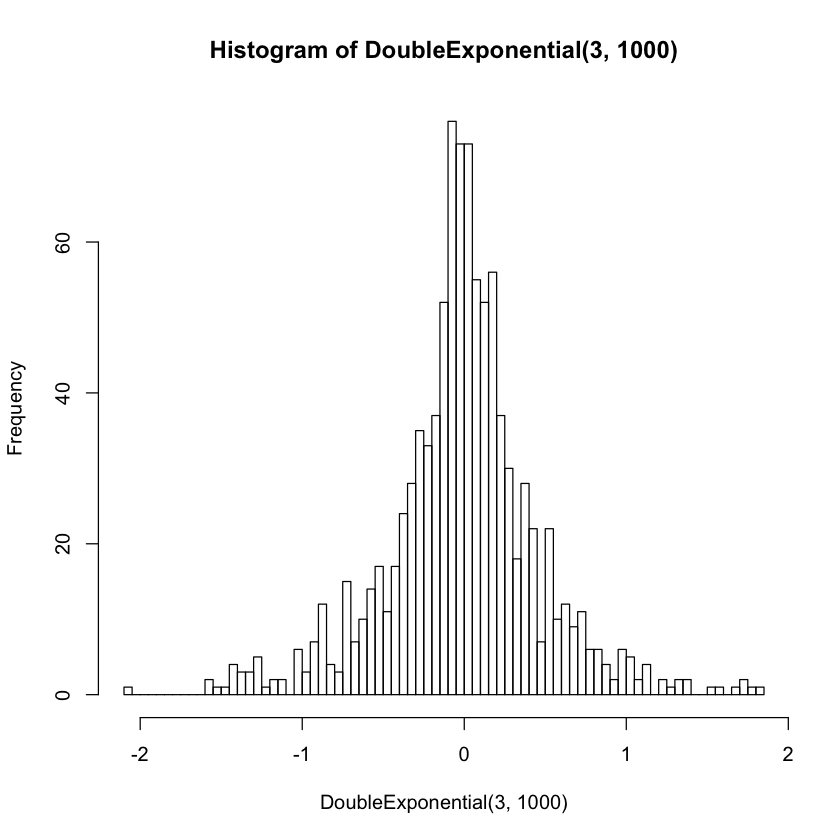

In [198]:
hist(DoubleExponential(3, 1000), breaks = 100)

Looks good! 

 ## Part (b)

We'll need the pdf of both the masking distribution (Double Exponential Distribution), and the target distribution (Normal Distribution).

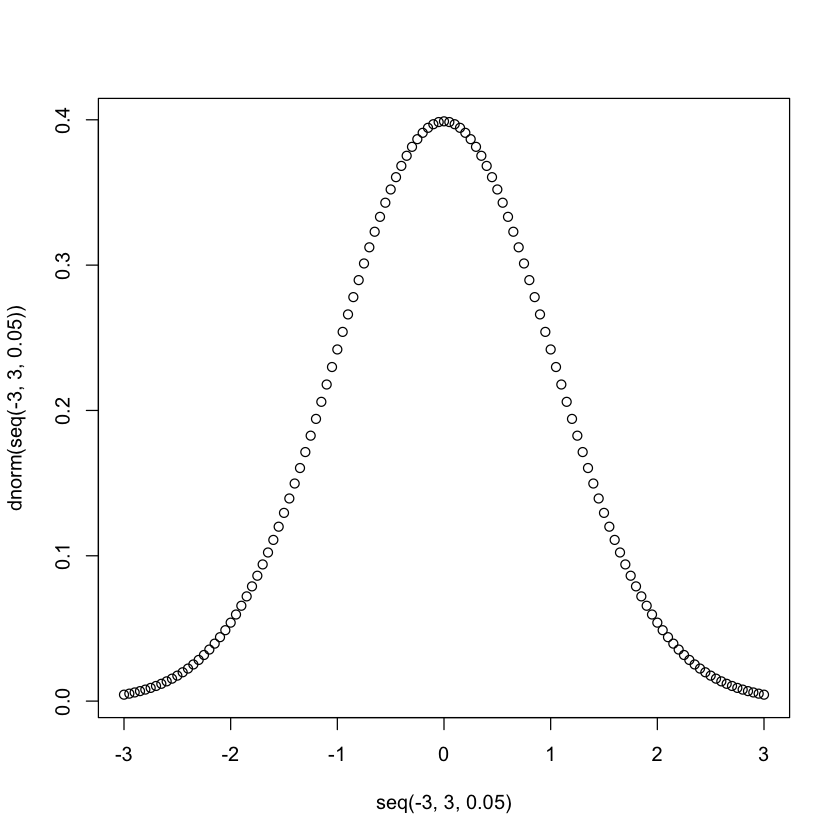

In [210]:
plot(seq(-3,3,0.05),dnorm(seq(-3,3,0.05)))

In [273]:
DE_pdf <- function(x, lambda = 1) {
    return((lambda/2.0)*exp(1)^(-lambda*abs(x)))
    
}

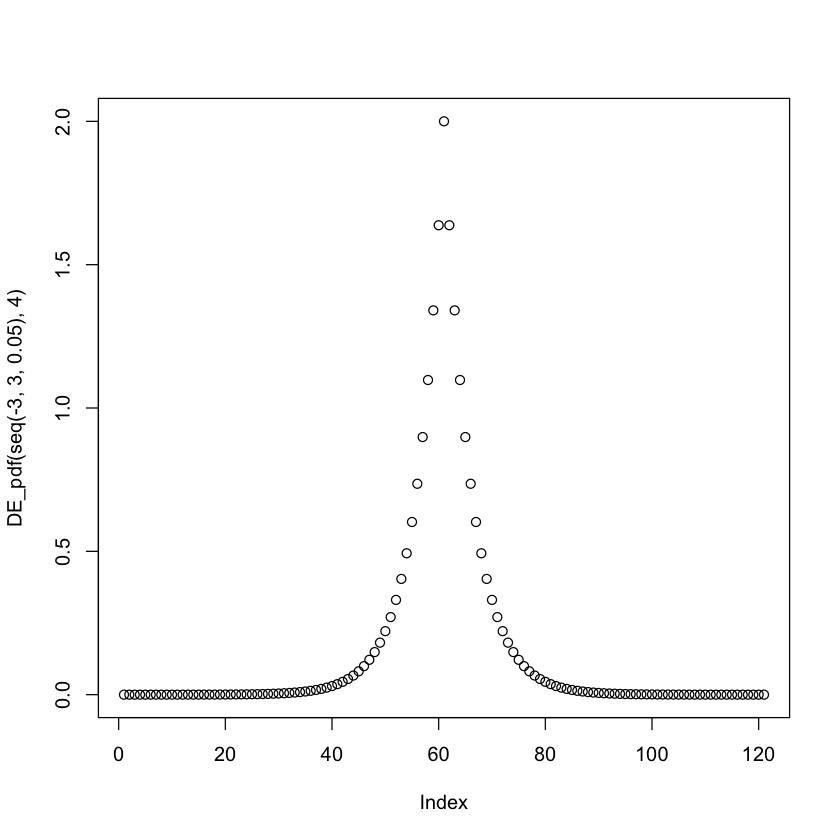

In [217]:
plot(DE_pdf(seq(-3,3,0.05),4))

In [225]:
FindC <- function(maskpdf, targetpdf, param1, prange = seq(-3,3,0.01), by = 0.01) {
    
    grid <- seq(min(prange),max(prange), by)
    
    c <- max((targetpdf(grid))/(maskpdf(grid, param1)))
    
    return(c)
}

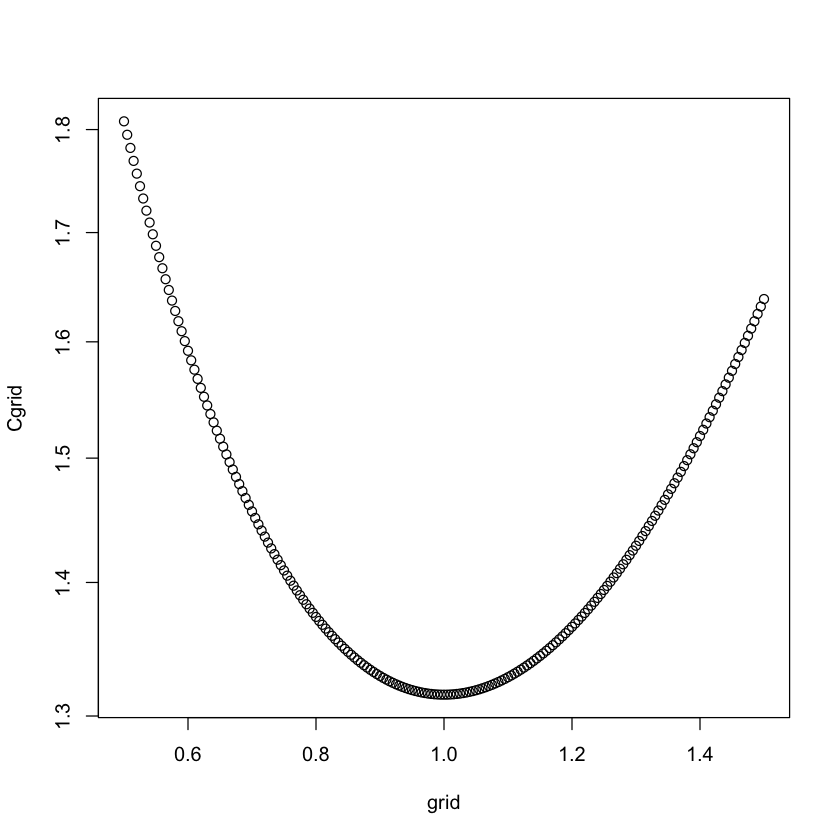

In [240]:
grid <- seq(0.5,1.5, 0.005)
Cgrid <- c()
i <- 0

for (lambda in grid) {
        i <- i + 1
        Cgrid[i] <- FindC(DE_pdf, dnorm, lambda)
}

plot(grid,Cgrid, log = 'y')

This grid search tells us that the C to us is about 1.3154...

In [298]:
min(Cgrid)

[1] 1.315489

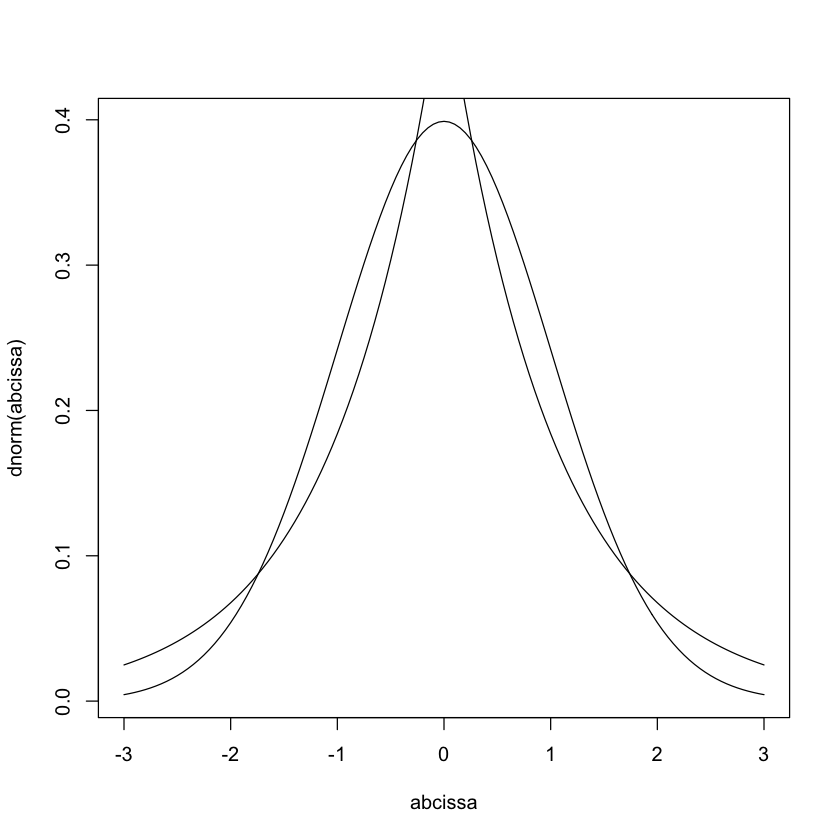

In [259]:
abcissa <- seq(-3,3,0.05)

plot(abcissa,dnorm(abcissa), type = 'l')
par(new = T)
lines(abcissa,DE_pdf(abcissa, 1.0), type = 'l')
par(new = F)

In [263]:
sd(DoubleExponential(1.4, 1000))
sd(rnorm(1000))

[1] 0.9828814

[1] 1.005891

It looks like choosing $\lambda \approx 4$ gets us a standard deviation of 1.

 ## Part (c)

In [293]:
MaskingDraw <- function(maskdraw, maskpdf, goalpdf, c, n_iters) {
    
    out <- c()
        
    for (i in (1:n_iters)) {
        
        pull <- maskdraw(lambda = 1, 1) #the initial value we are pulling from the masking distribution
        crit <- (goalpdf(pull))/(c*maskpdf(pull))
        
        U <- runif(1)
        
        if (U <= crit) {
            out[i] <- pull
            }
    }
    return(out)
    }


In [295]:
sd(na.omit(MaskingDraw(DoubleExponential, DE_pdf, dnorm, min(Cgrid), 10000)))

[1] 1.00032

The resulting distribution has a standard deviation of one. Here is how the histogram looks:

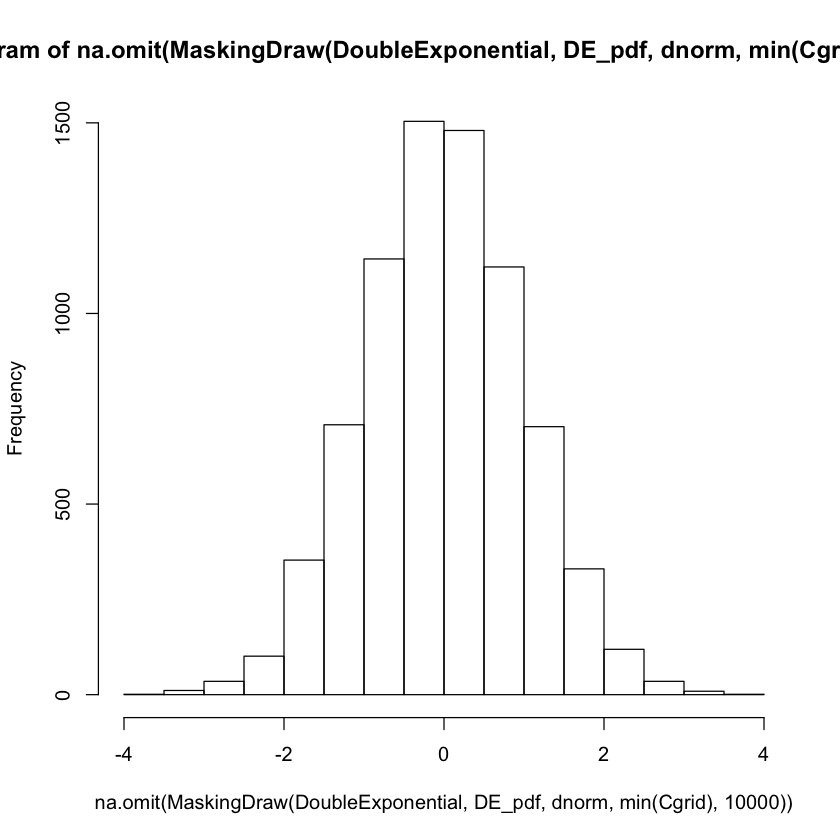

In [299]:
hist(na.omit(MaskingDraw(DoubleExponential, DE_pdf, dnorm, min(Cgrid), 10000)))

In [300]:
mask_draws <- MaskingDraw(DoubleExponential, DE_pdf, dnorm, min(Cgrid), 10000)

In [303]:
rejection_probability <- (length(mask_draws) - length(na.omit(mask_draws)))/length(mask_draws)
print(rejection_probability)

[1] 0.2332


For C = 1.3155, about 23.32% of the draws were rejected by the masking process.

 # Problem 3

In [60]:
MapPDF <- function(u, alpha, theta) { 
    #
    # Maps uniforms to a new pdf as described in problem 3:
    #
    # f(x) = alpha*x^(\theta)
    #
    # Args:
    #    u: The input uniform that is to be mapped
    #    alpha: the 'alpha' parameter in the pdf definition
    #    theta: the 'theta parameter in the pdf definition
    # Returns:
    #    out: a float of the mapped uniform
    
    return(((u*(theta + 1))/alpha)^(1/theta))
    }

We are taking the function $x = (\frac{u(\theta + 1)}{\alpha})^{\frac{1}{\theta}}$

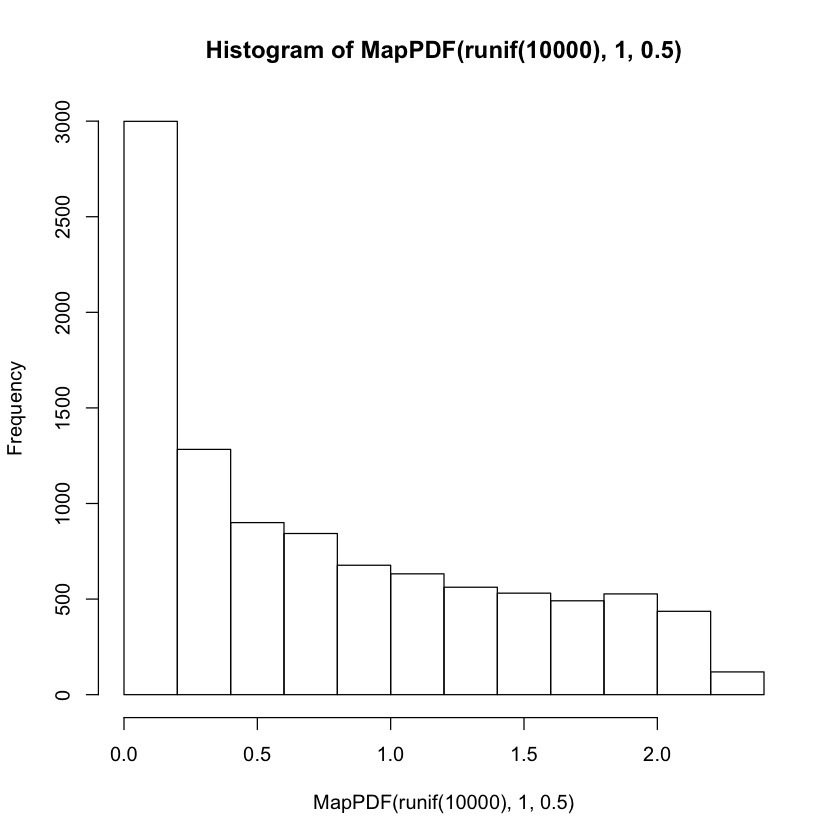

In [71]:
hist(MapPDF(runif(10000), 1,0.5))

 # Problem 4

In [335]:
pdf <- function(x, theta = 0, c = 2*pi) { 
    #
    # Evaluates the PDF in problem 4
    #
    # Args:
    #    x: point to evaluate pdf 
    #    theta: phase offset in input funciton
    #    c: normalization constant, defaults to 1
    #
    # Returns:
    #    pdf(x): pdf evaluated at x
    
    return((1 - cos(x - theta))/(c))
                
}
    

StochasticIntegral <- function(pdf, prange = c(0,2*pi), n_iters) {
    
    #
    # Performs stochastic (monte carlo) integration
    #
    # Args:
    #    pdf: the function to integrate
    #    prange: the range of x values to integrate over
    #    n_iters: number of draws to perform to evaluate the integral
    #
    # Returns:
    #    integral: the stochastic estimate of the integral
    
    V <- max(prange) - min(prange)
    hold <- c() #hold 
    i <- 0
    for (U in runif(n_iters)*V) {
        i <- i + 1
        hold[i] <- pdf(U, 0)  
    }
    
     return((sum(hold)/n_iters)*V)
}

  ## Part (a)

In [179]:
StochasticIntegral(pdf, n_iters = 10000)

[1] 6.266037

Looks like the normalization constant needs to be $2\pi$

Warning message:
In if (x < 0) {: the condition has length > 1 and only the first element will be usedWarning message:
In if (x > 2 * pi) {: the condition has length > 1 and only the first element will be used

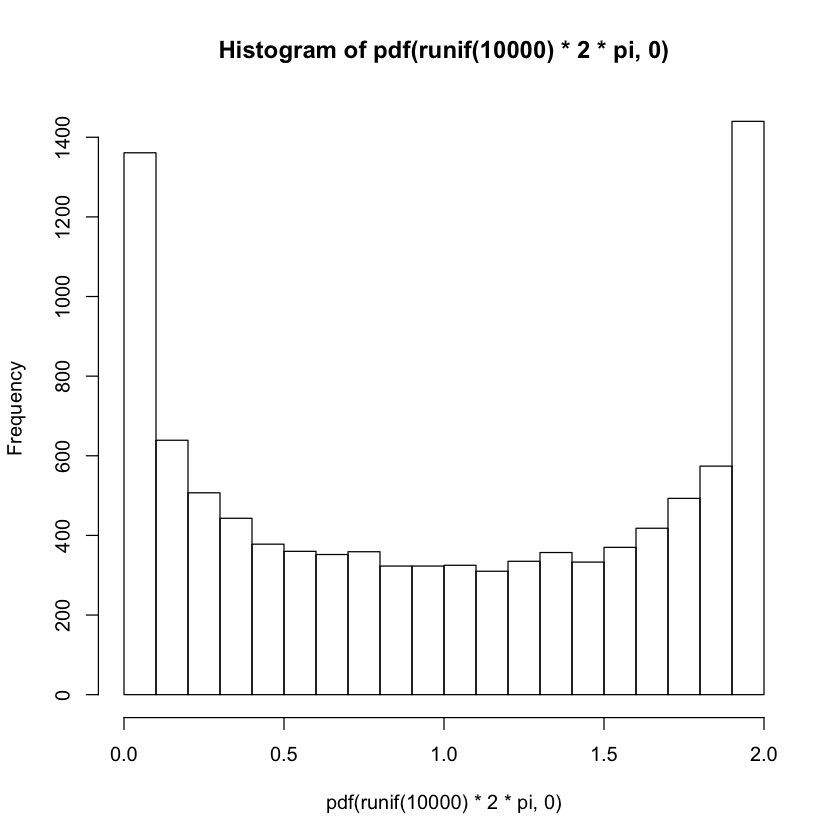

In [139]:
hist(pdf(runif(10000)*2*pi,0))

  ## Part (b)

  ## Part (c)

  ## Part (d)

In [346]:
FindC_2 <- function(maskpdf, goalpdf, prange = c(0.01,2*pi - 0.01), by = 0.01) {
    
    grid <- seq(min(prange),max(prange), by)
    
    c <- max((goalpdf(grid))/(maskpdf(grid, min = min(prange), max = max(prange))))
    
    return(c)
}

In [340]:
C2 <- FindC_2(dunif, pdf, by = 0.001)
print(C2)

[1] 1.993634


It appears that 2 is a good choice for c.

In [358]:
DrawPDF <- function(n_iter) {
    out <- c()
        
    for (i in (1:n_iter)) {
        
        pull <- runif(1,min = 0, max = 2*pi) #the initial value we are pulling from the masking distribution
        crit <- (2*pi*pdf(pull))/C2
        
        U <- runif(1)
        
        if (U <= crit) {
            out[i] <- pull
            }
        }
    return(out)
    }


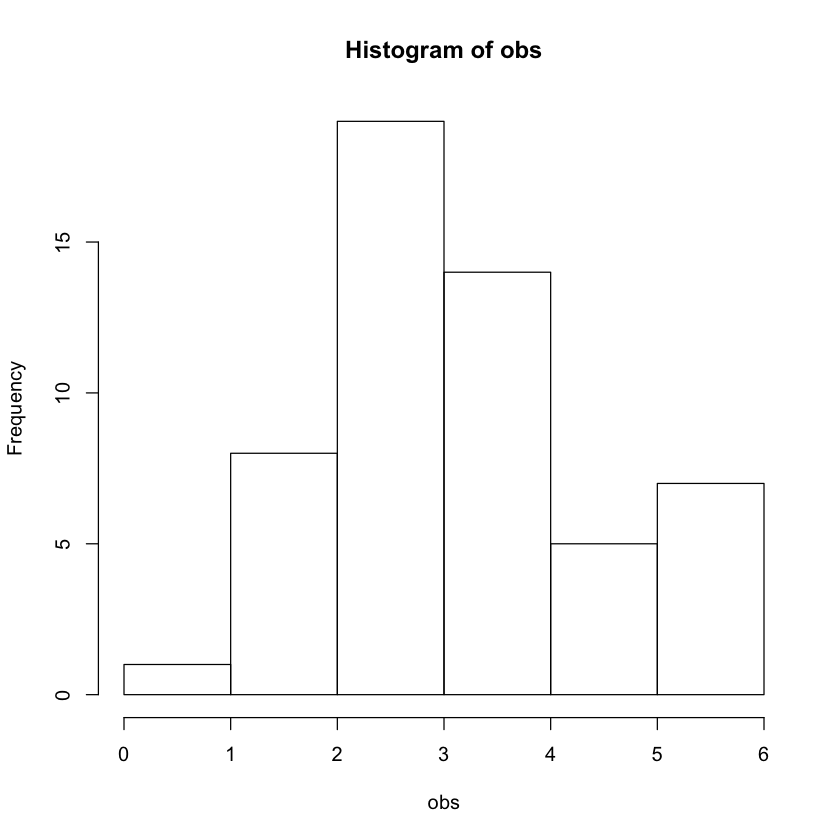

In [360]:
obs <- DrawPDF(100)

hist(obs)

In [367]:
L <- function(pdf, obs, ll = TRUE) {
    
    out <- c()
    
    if (ll == TRUE) {
        out <- log(prod(pdf(obs), na.rm = TRUE))
    }
    else if (ll == FALSE) {
        out <- prod(pdf(obs), na.rm = TRUE)
    }
    
    return(out)
}

In [368]:
L(pdf,obs)

[1] -90.06017

  ## Part (e)